## Final Project Submission

Please fill out:
* Student name: Carlos Marin
* Student pace: self paced 
* Scheduled project review date/time: 
* Instructor name: Abhineet
* Blog post URL:


# To Renovate or not to renovate?
Everyday houses go on sale in America. Some Americans choose to renovate before they sell others renovate after they 
purchase. The purpose of this project is to evalute and create multiple regression model to evaluate renovated and non renovated homes, and to see how they affect house pricing.

In [338]:
# First we import packages to be used.
import markdown
import pandas as pd
import numpy as np
from numpy import mean
from numpy import absolute
from numpy import sqrt
import csv
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import linear_model
from sklearn.model_selection import KFold



plt.style.use('seaborn')

In [45]:
#upload data to be used.
df = pd.read_csv('data/kc_house_data.csv')

In [46]:
with open('column_names.md', 'r') as f:
    file_info = f.read()

In [47]:
#This tells us the what each column represents
file_info

'# Column Names and Descriptions for King County Data Set\n* `id` - Unique identifier for a house\n* `date` - Date house was sold\n* `price` - Sale price (prediction target)\n* `bedrooms` - Number of bedrooms\n* `bathrooms` - Number of bathrooms\n* `sqft_living` - Square footage of living space in the home\n* `sqft_lot` - Square footage of the lot\n* `floors` - Number of floors (levels) in house\n* `waterfront` - Whether the house is on a waterfront\n  * Includes Duwamish, Elliott Bay, Puget Sound, Lake Union, Ship Canal, Lake Washington, Lake Sammamish, other lake, and river/slough waterfronts\n* `view` - Quality of view from house\n  * Includes views of Mt. Rainier, Olympics, Cascades, Territorial, Seattle Skyline, Puget Sound, Lake Washington, Lake Sammamish, small lake / river / creek, and other\n* `condition` - How good the overall condition of the house is. Related to maintenance of house.\n  * See the [King County Assessor Website](https://info.kingcounty.gov/assessor/esales/Glo

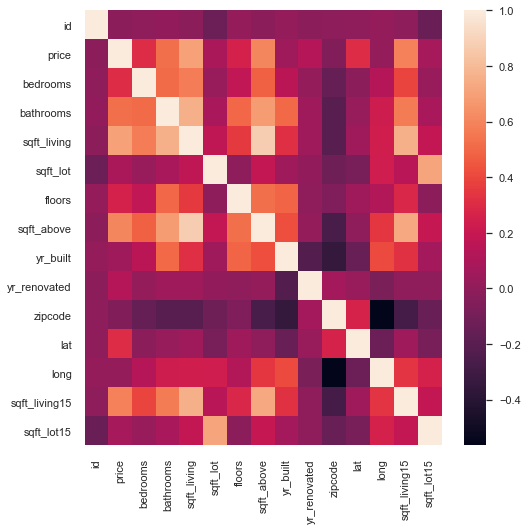

In [48]:
 # Before we can move forward, we need to determine which are the strong variables associated with price.
#seaborn heatmap to see correlation visually

sns.set(rc = {'figure.figsize':(8,8)})
sns.heatmap(df.corr());

In [49]:
# to determine which columns have the strongest correlation to price. We the top two columns that impace price are 
# For the sake of the project, we will ignore sqft_above.  
# Only sqft_living, bedrooms, sqft_above,and bathrooms will be used
data_corrs = df.corr()['price'].map(abs).sort_values(ascending = False)
data_corrs

price            1.000000
sqft_living      0.701917
sqft_above       0.605368
sqft_living15    0.585241
bathrooms        0.525906
bedrooms         0.308787
lat              0.306692
floors           0.256804
yr_renovated     0.129599
sqft_lot         0.089876
sqft_lot15       0.082845
yr_built         0.053953
zipcode          0.053402
long             0.022036
id               0.016772
Name: price, dtype: float64

#### bedrooms - Number of bedrooms
#### bathrooms - Number of bathrooms
#### sqft_above - Square footage of house apart from basement
#### sqft_living - Square footage of living space in the home

In [50]:
# we will drop the following columns
df00 = df.drop(columns =['date','lat', 'long', 'sqft_living15', 
                            'sqft_lot15', 'waterfront','view', 'sqft_lot', 'floors', 'condition', 'grade',
                         'sqft_basement', 'yr_built', 'zipcode', 'id'], axis = 1)

In [51]:
#df1 will particularly show only homes renovated
df01 = df00[df00['yr_renovated']> 1900]

In [52]:
df1 = df01.drop(columns = ['yr_renovated'], axis = 1)

In [53]:
df1.dropna(inplace = True)

In [54]:
#prepping to prepare non-renovated dataset
df00['yr_renovated'].fillna(4000, inplace = True)

In [55]:
#df2 will be non-renovated data set
df02 = df00[df00['yr_renovated']> 3000]

In [56]:
df2 = df02.drop(columns = ['yr_renovated'], axis = 1)

In [57]:
df2.dropna(inplace = True)

In [58]:
df1

,price,bedrooms,bathrooms,sqft_living,sqft_above
1,538000.0,3,2.25,2570,2170
35,696000.0,3,2.50,2300,1510
95,905000.0,4,2.50,3300,2390
103,1090000.0,3,2.50,2920,2920
125,1450000.0,4,2.75,2750,1980
...,...,...,...,...,...
19602,451000.0,2,1.00,900,900
20041,434900.0,3,2.00,1520,1520
20428,500012.0,4,2.50,2400,1230
20431,356999.0,3,1.50,1010,1010


In [59]:
df2

,price,bedrooms,bathrooms,sqft_living,sqft_above
2,180000.0,2,1.00,770,770
12,310000.0,3,1.00,1430,1430
23,252700.0,2,1.50,1070,1070
26,937000.0,3,1.75,2450,1750
28,438000.0,3,1.75,1520,790
...,...,...,...,...,...
21576,475000.0,3,2.25,1190,1190
21577,1090000.0,5,3.75,4170,4170
21579,520000.0,2,2.25,1530,1480
21581,1580000.0,4,3.25,3410,3410


In [60]:
x_cols = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_above']

In [61]:
#DATA PREPROCESSING - Using normalization on on renovated data set
for col in x_cols:
    df1[col] = (df1[col] - df1[col].mean())/df1[col].std()
df1.head()

,price,bedrooms,bathrooms,sqft_living,sqft_above
1,538000.0,-0.430078,-0.062473,0.222793,0.342909
35,696000.0,-0.430078,0.215851,-0.025140,-0.434072
95,905000.0,0.505530,0.215851,0.893132,0.601903
103,1090000.0,-0.430078,0.215851,0.544188,1.225842
125,1450000.0,0.505530,0.494175,0.388082,0.119232


In [62]:
#DATA PREPROCESSING - Using Normalization non-renovated data set
for col in x_cols:
    df2[col] = (df2[col] - df2[col].mean())/df2[col].std()
df2.head()

,price,bedrooms,bathrooms,sqft_living,sqft_above
2,180000.0,-1.506547,-1.411777,-1.403767,-1.206849
12,310000.0,-0.389574,-1.411777,-0.686661,-0.414204
23,252700.0,-1.506547,-0.766633,-1.077810,-0.846556
26,937000.0,-0.389574,-0.444061,0.421594,-0.029892
28,438000.0,-0.389574,-0.444061,-0.588874,-1.182830


# identifying multicolinearity

In [63]:
#it appears bathrooms and sqft living are highly correlated
abs(df1.corr()) > 0.75

,price,bedrooms,bathrooms,sqft_living,sqft_above
price,True,False,False,True,False
bedrooms,False,True,False,False,False
bathrooms,False,False,True,True,False
sqft_living,True,False,True,True,True
sqft_above,False,False,False,True,True


In [64]:
#it appears bathrooms and sqft living are highly correlated
abs(df2.corr()) > 0.75

,price,bedrooms,bathrooms,sqft_living,sqft_above
price,True,False,False,False,False
bedrooms,False,True,False,False,False
bathrooms,False,False,True,True,False
sqft_living,False,False,True,True,True
sqft_above,False,False,False,True,True


## Single Linear Regression - Renovated data
Before we get started on multiple linear regression, we are going to look at how each variable in this case it is bedrooms, bathrooms, and square foot living affect price. We will evaluate for both renovated and non-renovated data sets. We also look at the coefficient value, to see how each increases the more each is added (for clarification, how much does each bathroom affect price?. 

In [65]:
price_bedrooms = ols('price~bedrooms', data = df1).fit()
price_bedrooms.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.102
Model:                            OLS   Adj. R-squared:                  0.101
Method:                 Least Squares   F-statistic:                     84.54
Date:                Thu, 28 Apr 2022   Prob (F-statistic):           3.73e-19
Time:                        18:44:22   Log-Likelihood:                -10947.
No. Observations:                 744   AIC:                         2.190e+04
Df Residuals:                     742   BIC:                         2.191e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7.689e+05   2.18e+04     35.273      0.000    7.26e+05    8.12e+05
bedrooms    2.006e+05   2.18e+04      9.194      0.000    1.58e+05    2.43e+05
==============================================================================
Omnibus:                      723.807   Durbin-Watson:                   2.072
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            40964.119
Skew:                           4.301   Prob(JB):                         0.00
Kurtosis:                      38.319   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [66]:
#Intercept mean of 768,901 means a house with zero bedrooms had price of 768,901, 
#This intercept is seen in renovated sets
#If you increase the amount of bedrooms the price increases by 200,562
print(price_bedrooms.params)

Intercept    768901.892473
bedrooms     200562.160472
dtype: float64


In [67]:
price_bathrooms = ols('price~bathrooms', data = df1).fit()
price_bathrooms.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.353
Model:                            OLS   Adj. R-squared:                  0.352
Method:                 Least Squares   F-statistic:                     404.4
Date:                Thu, 28 Apr 2022   Prob (F-statistic):           3.94e-72
Time:                        18:44:25   Log-Likelihood:                -10825.
No. Observations:                 744   AIC:                         2.165e+04
Df Residuals:                     742   BIC:                         2.166e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7.689e+05   1.85e+04     41.541      0.000    7.33e+05    8.05e+05
bathrooms   3.725e+05   1.85e+04     20.110      0.000    3.36e+05    4.09e+05
==============================================================================
Omnibus:                      625.477   Durbin-Watson:                   2.107
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            25727.578
Skew:                           3.490   Prob(JB):                         0.00
Kurtosis:                      30.950   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [68]:
#A House with zero bathrooms, has a price of 768,901
# Each bathroom increases price of home by 372,475 
print(price_bathrooms.params)

Intercept    768901.892473
bathrooms    372475.023791
dtype: float64


In [69]:
price_sqftliving = ols(formula = 'price~sqft_living', data = df1).fit()
price_sqftliving.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.644
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                     1343.
Date:                Thu, 28 Apr 2022   Prob (F-statistic):          1.17e-168
Time:                        18:44:26   Log-Likelihood:                -10602.
No. Observations:                 744   AIC:                         2.121e+04
Df Residuals:                     742   BIC:                         2.122e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    7.689e+05   1.37e+04     56.027      0.000    7.42e+05    7.96e+05
sqft_living  5.033e+05   1.37e+04     36.651      0.000    4.76e+05     5.3e+05
==============================================================================
Omnibus:                      242.602   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1886.160
Skew:                           1.247   Prob(JB):                         0.00
Kurtosis:                      10.391   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [70]:
# each square footage of living area the room increases price by 503,335
print(price_sqftliving.params)

Intercept      768901.892473
sqft_living    503335.702505
dtype: float64


In [163]:
price_sqftabove = ols(formula = 'price~sqft_above', data = df1).fit()
price_sqftabove.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.478
Model:                            OLS   Adj. R-squared:                  0.477
Method:                 Least Squares   F-statistic:                     678.5
Date:                Fri, 29 Apr 2022   Prob (F-statistic):          9.91e-107
Time:                        00:21:28   Log-Likelihood:                -10745.
No. Observations:                 744   AIC:                         2.149e+04
Df Residuals:                     742   BIC:                         2.150e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7.689e+05   1.66e+04     46.240      0.000    7.36e+05    8.02e+05
sqft_above  4.334e+05   1.66e+04     26.047      0.000    4.01e+05    4.66e+05
==============================================================================
Omnibus:                      347.417   Durbin-Watson:                   2.028
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4206.836
Skew:                           1.778   Prob(JB):                         0.00
Kurtosis:                      14.093   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [164]:
# Each square foot above seperated from the basement increases the price by 433,411
print(price_sqftabove.params)

Intercept     768901.892473
sqft_above    433411.990515
dtype: float64


## Single linear regression - Non renovated data

In [19]:
NR_bed = ols (formula = 'price~bedrooms', data = df2).fit()
NR_bed.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.101
Model:                            OLS   Adj. R-squared:                  0.101
Method:                 Least Squares   F-statistic:                     430.5
Date:                Thu, 28 Apr 2022   Prob (F-statistic):           1.03e-90
Time:                        18:41:42   Log-Likelihood:                -54383.
No. Observations:                3842   AIC:                         1.088e+05
Df Residuals:                    3840   BIC:                         1.088e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.131e+05   2.12e+04      5.325      0.000    7.14e+04    1.55e+05
bedrooms    1.271e+05   6125.007     20.747      0.000    1.15e+05    1.39e+05
==============================================================================
Omnibus:                     2826.320   Durbin-Watson:                   1.909
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            77460.685
Skew:                           3.210   Prob(JB):                         0.00
Kurtosis:                      24.039   Cond. No.                         14.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
#Intercept mean of 113,061 means a house with zero bedrooms had price of 113,061
#If you increase the amount of bedrooms the price increases by 127,077
print(NR_bed.params)

Intercept    113061.358262
bedrooms     127077.941439
dtype: float64


In [21]:
NR_bath = ols (formula = 'price~bathrooms', data = df2).fit()
NR_bath.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.276
Model:                            OLS   Adj. R-squared:                  0.275
Method:                 Least Squares   F-statistic:                     1461.
Date:                Thu, 28 Apr 2022   Prob (F-statistic):          3.09e-271
Time:                        18:41:42   Log-Likelihood:                -53968.
No. Observations:                3842   AIC:                         1.079e+05
Df Residuals:                    3840   BIC:                         1.080e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3.025e+04   1.42e+04      2.133      0.033    2451.242    5.81e+04
bathrooms   2.428e+05   6350.324     38.227      0.000     2.3e+05    2.55e+05
==============================================================================
Omnibus:                     2548.395   Durbin-Watson:                   1.924
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            56560.594
Skew:                           2.823   Prob(JB):                         0.00
Kurtosis:                      20.929   Cond. No.                         7.59
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
#A House with zero bathrooms, has a price of 30,252
# Each bathroom increases price of 24,2754 each
print(NR_bath.params)

Intercept     30252.007512
bathrooms    242754.040349
dtype: float64


In [23]:
NR_sqft = ols (formula = 'price~sqft_living', data = df2).fit()
NR_sqft.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.481
Model:                            OLS   Adj. R-squared:                  0.481
Method:                 Least Squares   F-statistic:                     3566.
Date:                Thu, 28 Apr 2022   Prob (F-statistic):               0.00
Time:                        18:41:42   Log-Likelihood:                -53326.
No. Observations:                3842   AIC:                         1.067e+05
Df Residuals:                    3840   BIC:                         1.067e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -1.846e+04   1.02e+04     -1.807      0.071   -3.85e+04    1572.183
sqft_living   270.1648      4.524     59.713      0.000     261.294     279.035
==============================================================================
Omnibus:                     2129.997   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            33681.217
Skew:                           2.296   Prob(JB):                         0.00
Kurtosis:                      16.759   Cond. No.                     5.54e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.54e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [24]:
#A house with zero square foot living area has an intercept of  -18,457
# but each square footage of living area the room increases price by 270.
print(NR_sqft.params)

Intercept     -18457.281704
sqft_living      270.164846
dtype: float64


In [165]:
NR_above = ols (formula = 'price~sqft_above', data = df2).fit()
NR_above.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.354
Model:                            OLS   Adj. R-squared:                  0.354
Method:                 Least Squares   F-statistic:                     2103.
Date:                Fri, 29 Apr 2022   Prob (F-statistic):               0.00
Time:                        00:27:09   Log-Likelihood:                -53748.
No. Observations:                3842   AIC:                         1.075e+05
Df Residuals:                    3840   BIC:                         1.075e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.386e+05   4647.807    115.886      0.000     5.3e+05    5.48e+05
sqft_above  2.132e+05   4648.412     45.857      0.000    2.04e+05    2.22e+05
==============================================================================
Omnibus:                     2540.727   Durbin-Watson:                   1.949
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            58063.491
Skew:                           2.799   Prob(JB):                         0.00
Kurtosis:                      21.203   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [166]:
#A house with zero square foot area seperate from basement has an intercept of 538,617
#Each squarefoot above from basement increases value by 213,159
print(NR_above.params)

Intercept     538617.004945
sqft_above    213159.914974
dtype: float64


We can already see a drastic price decrease when we compare the bedrooms, bathrooms, square foot above and sqft living of both renovated and non renovated homes. Next steps is too combine all of these, into two single multiple linear regression models to see how combined they affect the price of a home. 

## Multiple linear regression

In [25]:
from statsmodels.formula.api import ols

In [26]:
# OLS analysis for Renovated Data set
outcome = 'price'
x_cols = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_above']
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula = formula, data = df1).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.663
Model:                            OLS   Adj. R-squared:                  0.661
Method:                 Least Squares   F-statistic:                     363.9
Date:                Thu, 28 Apr 2022   Prob (F-statistic):          5.37e-173
Time:                        18:41:43   Log-Likelihood:                -10582.
No. Observations:                 744   AIC:                         2.117e+04
Df Residuals:                     739   BIC:                         2.120e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -9.652e+04   4.76e+04     -2.029      0.043    -1.9e+05   -3124.926
bedrooms    -9.915e+04   1.57e+04     -6.300      0.000    -1.3e+05   -6.83e+04
bathrooms    1.671e+04   2.44e+04      0.684      0.494   -3.13e+04    6.47e+04
sqft_living   513.3301     28.410     18.069      0.000     457.557     569.103
sqft_above    -13.2030     31.605     -0.418      0.676     -75.249      48.843
==============================================================================
Omnibus:                      198.824   Durbin-Watson:                   1.943
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1289.530
Skew:                           1.034   Prob(JB):                    9.60e-281
Kurtosis:                       9.109   Cond. No.                     1.19e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.19e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [27]:
print(model.params)

Intercept     -96515.086768
bedrooms      -99149.037490
bathrooms      16708.797247
sqft_living      513.330096
sqft_above       -13.203019
dtype: float64


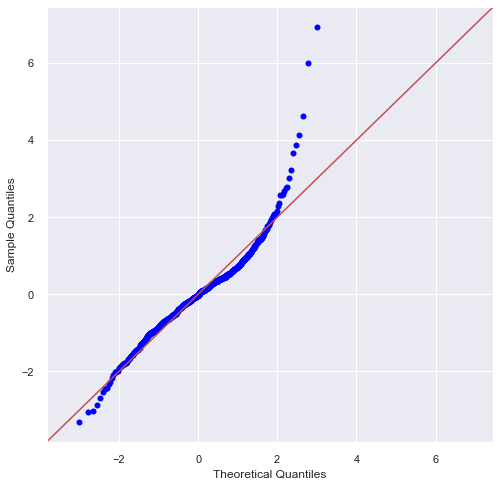

In [28]:
#This QQ plot is used to see how many outliers we have, which will be removed later
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

In [29]:
#OLS Anaalysis for NON - renovated data set
outcome = 'price'
x_cols = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_above']
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model2 = ols(formula = formula, data = df2).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.497
Model:                            OLS   Adj. R-squared:                  0.497
Method:                 Least Squares   F-statistic:                     949.3
Date:                Thu, 28 Apr 2022   Prob (F-statistic):               0.00
Time:                        18:41:44   Log-Likelihood:                -53266.
No. Observations:                3842   AIC:                         1.065e+05
Df Residuals:                    3837   BIC:                         1.066e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    1.118e+05   1.66e+04      6.722      0.000    7.92e+04    1.44e+05
bedrooms    -6.126e+04   5773.964    -10.609      0.000   -7.26e+04   -4.99e+04
bathrooms    8958.1506   8300.776      1.079      0.281   -7316.206    2.52e+04
sqft_living   330.4232     11.019     29.987      0.000     308.820     352.027
sqft_above    -38.3823     10.430     -3.680      0.000     -58.830     -17.934
==============================================================================
Omnibus:                     2043.809   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            29458.326
Skew:                           2.202   Prob(JB):                         0.00
Kurtosis:                      15.831   Cond. No.                     1.25e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.25e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [30]:
print(model2.params)

Intercept      111790.919115
bedrooms       -61256.695006
bathrooms        8958.150600
sqft_living       330.423156
sqft_above        -38.382314
dtype: float64


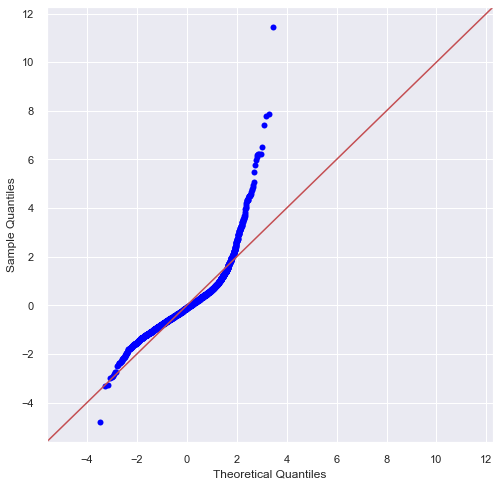

In [31]:
#This QQ plot is used to see how many outliers we have, that will need to be removed.
fig = sm.graphics.qqplot(model2.resid, dist=stats.norm, line='45', fit=True)

In both models, we see that they both have a low R-squared under 70%. R squared is used to determine the strength of the linear model and dependent variables. Because both have a low R squared, 

## Trimming data 
There are known outliers based on the QQ plots seen above, in order to increase model accuracy when it comes to predicting data, we need to remove these outliers.

In [300]:
#Finding a cutoff point
for i in range(90, 99):
    q = i / 100
    print('{} percentile: {}'.format(q, df1['price'].quantile(q=q)))

0.9 percentile: 1397000.0000000005
0.91 percentile: 1455199.9999999998
0.92 percentile: 1515600.0000000007
0.93 percentile: 1639600.0000000005
0.94 percentile: 1694199.9999999995
0.95 percentile: 1792500.0000000012
0.96 percentile: 1902799.9999999998
0.97 percentile: 2142600.0000000023
0.98 percentile: 2401400.0


/Users/carlosmarin/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price'>

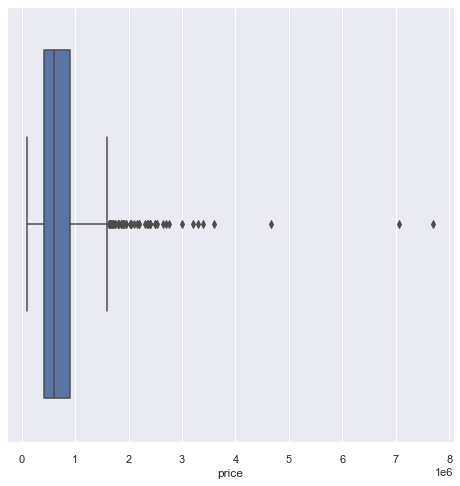

In [301]:
#Looking at the boxplot and using the quartile data above, it appears that outliers begin after the 96 percentile.
#therefore we will trim our data, to contain no more than the 94 percentile of the data for pricing
sns.boxplot(df1['price'])

In [302]:
# After trimming data, you will only 0.05 percent was removed

subset1= df1[df1['price'] < 1694199]
print('Percent removed:',(len(df1) - len(subset1))/len(df1))
outcome = 'price'
x_cols = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_above']
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
modelA1 = ols(formula = formula, data = subset1).fit()
modelA1.summary()

Percent removed: 0.06048387096774194


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.490
Method:                 Least Squares   F-statistic:                     168.6
Date:                Fri, 29 Apr 2022   Prob (F-statistic):          8.53e-101
Time:                        01:14:55   Log-Likelihood:                -9654.2
No. Observations:                 699   AIC:                         1.932e+04
Df Residuals:                     694   BIC:                         1.934e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    6.936e+05   9301.835     74.565      0.000    6.75e+05    7.12e+05
bedrooms    -5.429e+04   1.17e+04     -4.629      0.000   -7.73e+04   -3.13e+04
bathrooms    8.895e+04   1.55e+04      5.753      0.000    5.86e+04    1.19e+05
sqft_living  3.141e+05   2.42e+04     12.959      0.000    2.67e+05    3.62e+05
sqft_above  -6.582e+04   1.94e+04     -3.395      0.001   -1.04e+05   -2.78e+04
==============================================================================
Omnibus:                       25.160   Durbin-Watson:                   2.017
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               29.198
Skew:                           0.403   Prob(JB):                     4.57e-07
Kurtosis:                       3.595   Cond. No.                         4.75
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## To summarize data, after trimming we can now determine the multiple linear regression formula... The Renovated House multiple regression formula is: 

#### # Price = 693600 + (-5,4290)(Bedrooms) + 88,950(bathrooms)+ (314,100)(Sqft_living)+ (-65,820)(sqft_above)

# Price = 693600 + (-5,4290)(X1) + 88,950(X2)+ (314,100)(X3)+ (-65,820)(X4)

#### Where each X represents the quantity of each per home

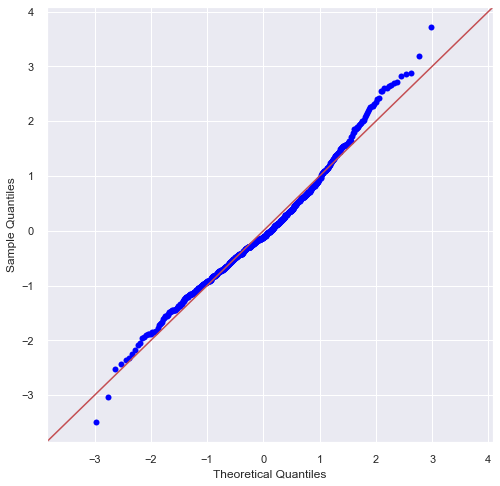

In [303]:
fig = sm.graphics.qqplot(modelA1.resid, dist=stats.norm, line='45', fit=True)

In [304]:
#Finding a cutoff point
for i in range(90, 99):
    q = i / 100
    print('{} percentile: {}'.format(q, df2['price'].quantile(q=q)))

0.9 percentile: 885000.0
0.91 percentile: 919965.5
0.92 percentile: 953880.000000001
0.93 percentile: 1000000.0
0.94 percentile: 1090000.0
0.95 percentile: 1180000.0
0.96 percentile: 1260000.0
0.97 percentile: 1417699.9999999998
0.98 percentile: 1621799.9999999984


/Users/carlosmarin/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price'>

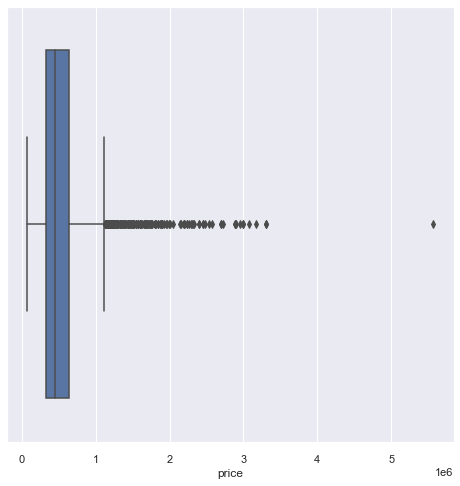

In [305]:
#Looking at the boxplot and using the quartile data above, it appears that outliers begin after the 94 percentile.
#therefore we will trim our data, to contain no more than the 94 percentile of the data for pricing
sns.boxplot(df2['price'])

In [306]:
subset2= df2[df2['price'] < 1090000.0]
print('Percent removed:',(len(df2) - len(subset2))/len(df2))
outcome = 'price'
x_cols = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_above']
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
modelA2 = ols(formula = formula, data = subset2).fit()
modelA2.summary()

Percent removed: 0.06038521603331598


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.389
Model:                            OLS   Adj. R-squared:                  0.389
Method:                 Least Squares   F-statistic:                     574.6
Date:                Fri, 29 Apr 2022   Prob (F-statistic):               0.00
Time:                        01:14:56   Log-Likelihood:                -48348.
No. Observations:                3610   AIC:                         9.671e+04
Df Residuals:                    3605   BIC:                         9.674e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    4.898e+05   2670.626    183.396      0.000    4.85e+05    4.95e+05
bedrooms    -2.591e+04   3406.395     -7.607      0.000   -3.26e+04   -1.92e+04
bathrooms    1.089e+04   4197.945      2.593      0.010    2655.323    1.91e+04
sqft_living  1.625e+05   7293.644     22.278      0.000    1.48e+05    1.77e+05
sqft_above  -4469.6921   5948.540     -0.751      0.452   -1.61e+04    7193.148
==============================================================================
Omnibus:                      194.547   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              227.810
Skew:                           0.580   Prob(JB):                     3.40e-50
Kurtosis:                       3.409   Cond. No.                         5.23
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### non-Renovated formula for multiple Linear Regression

### Price = 489,800 + (-25910)(bedrooms) + 10,890(Bathrooms)+ 162,500(sqft_living)+ (-4469)(sqft_above)

### Price = 489,800 + (-25910)(x1) + 10,890(x2)+ 162,500(x3)+ (-4469)(x4)

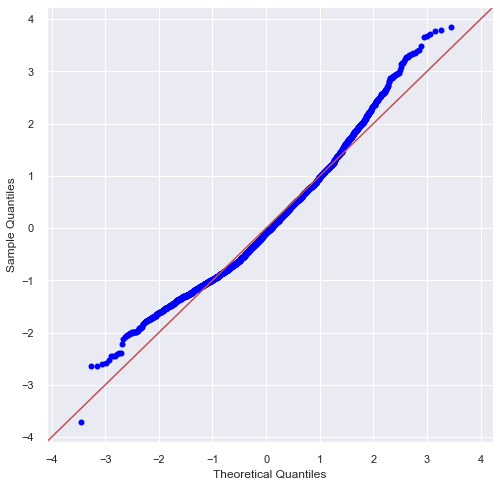

In [307]:
fig = sm.graphics.qqplot(modelA2.resid, dist=stats.norm, line='45', fit=True)

## To summarize data, after trimming we can now determine the multiple linear regression formula... The Renovated House multiple regression formula is: 

####  Price = 693600 + (-5,4290)(Bedrooms) + 88,950(bathrooms)+ (314,100)(Sqft_living)+ (-65,820)(sqft_above)

### Price = 693600 + (-5,4290)(X1) + 88,950(X2)+ (314,100)(X3)+ (-65,820)(X4)


## non-Renovated formula for multiple Linear Regression

#### Price = 489,800 + (-25,910)(bedrooms) + 10,890(Bathrooms)+ 162,500(sqft_living)+ (-4469)(sqft_above)

### Price = 489,800 + (-25,910)(x1) + 10,890(x2)+ 162,500(x3)+ (-4469)(x4)

### What does the formula tell us?
First, there is negative correlation between price and bedrooms  in both renovated and non-renovated data sets, also in square foot above. 
BUT the negative impact of bedrooms is decreased greatly in the renovated data set as opposed to the non renovated set. The square foot above impact is smaller on the non-renovated compared to the renovated.

In terms positive correlation. The price of renovated bathrooms is greatly increased in renovated houses as opposed to non-renovated bathrooms. There is also a good increase when it comes to square foot living area in renovated homes as opposed to non-renovated homes


## Regression Model Validation

This step we create test and train sets from the x colums and y column('price'). This data will be used later for K Cross Model Validation, and scoring accuracy of the model for both data sets

In [308]:
#defining Y and X for renovated data set
y1 = subset1[['price']]
x1 = subset1.drop(['price'], axis = 1)

In [309]:
#defining Y and X for non-renovated data set
y2 = subset2[['price']]
x2 = subset2.drop(['price'], axis = 1)


In [310]:
x1_train, x1_test, y1_train,y1_test = train_test_split(x1, y1, test_size =0.2)

In [311]:
x2_train, x2_test, y2_train,y2_test = train_test_split(x2, y2, test_size =0.2)

In [312]:
print(len(x1_train), len(x1_test), len(y1_train,), len(y1_test))

559 140 559 140


In [313]:
print(len(x2_train), len(x2_test), len(y2_train,), len(y2_test))

2888 722 2888 722


### Fitting linear regression model
This is an alternative method done to calculate the intercepts, and coefficients not using the OLS.Statsmodels method

In [314]:
linr_model1 = LinearRegression().fit(x1,y1)

In [315]:
linr_model2 = LinearRegression().fit(x2,y2)

In [316]:
print('Coefficients: \n', linr_model1.coef_)

Coefficients: 
 [[-54292.51406405  88950.18680069 314125.90340053 -65823.61190042]]


In [317]:
print('Coefficients: \n', linr_model2.coef_)

Coefficients: 
 [[-25912.88519129  10885.90701072 162491.02794703  -4469.6920752 ]]


In [318]:
print('Intercepts: \n',linr_model1.intercept_)

Intercepts: 
 [693589.40455162]


In [319]:
print('Intercepts: \n',linr_model2.intercept_)

Intercepts: 
 [489781.66086286]


# K FOLD CROSS VALIDATION FOR THE RENOVATED AND NONRENOVATED DATA SETS


To evaluate the performance of the model, we need to measure how well predictions made by the model match the
observed data. This is done using K-Fold Cross-Validation.


In [320]:
#Here we define the cross-validation method to use
cv = KFold(n_splits = 10, random_state = 1, shuffle = True)

In [321]:
#From here we use tyhe K-Fold to evaluate the model, this is for the renovated data set
scores1 = cross_val_score(linreg, x1, y1, scoring = 'neg_mean_squared_error', cv=cv, n_jobs = -1)

In [322]:
sqrt(mean(absolute(scores1)))

243991.89308198149

In [323]:
#From here we use tyhe K-Fold to evaluate the model, this is for the non-renovated data set
scores2 = cross_val_score(linreg, x2, y2, scoring = 'neg_mean_squared_error', cv=cv, n_jobs = -1)

In [324]:
sqrt(mean(absolute(scores2)))

158777.75459071097

### MAE ( MEAN ABSOLUTE ERROR)
### The MAE for the renovated data set is 243,991
### The MAE for the non-renovated data set is 158,754
### Ideally, The lower the MAE score is, the more closeley  a model is able to predict actual observations.
### The model for non-renovated seems to be more accurate in comparison to renovated.

### Another Method to analze model performance is called ROOT MEAN SQUARED ERROR (RMSE), this is done using LOOCV (LEAVE ONE OUT CROSS VALIDATION)

In [325]:
#again define the define the cross-validation method to use.
cv = KFold(n_splits=10, random_state=1, shuffle=True) 

In [326]:
#using LOOCV (LEAVE ONE OUT CROSS VALIDATION) to evaluate model
scores01 = cross_val_score(linreg, x1, y1, scoring='neg_mean_squared_error',
                         cv=cv, n_jobs=-1)

In [327]:
#using LOOCV (LEAVE ONE OUT CROSS VALIDATION) to evaluate model
scores02 = cross_val_score(linreg, x2, y2, scoring='neg_mean_squared_error',
                         cv=cv, n_jobs=-1)

In [328]:
#view RMSE for renovated data sets
sqrt(mean(absolute(scores01)))

243991.89308198149

In [329]:
#view RMSE for non-renovated data sets
sqrt(mean(absolute(scores02)))

158777.75459071097

### The RMSE (ROOT MEAN SQUARED ERROR)
### The RMSE for the renovated data set is 243,991
### The RMSE for the non-renovated data set is 158,777
### Ideally just like the MAE, the lower the number the more closely a model is able to predict actual observations.
### The model for non-renovated seems to be more accurate in comparison to renovated.

# Modeling the data

In [330]:
lm = linear_model.LinearRegression()

In [331]:
#This is used to score the model accuracy.
model01 = lm.fit(x1_train, y1_train)
model02 = lm.fit(x2_train, y2_train)

In [332]:
#WE create the prediction which is plotted against in the renovated data set, against the y1 test set. 
prediction1 = linreg.predict(x1_test)

In [333]:
#WE create the prediction which is plotted against in the non-renovated data set, against the y1 test set.
prediction2 = linreg.predict(x2_test)

Text(0.5, 1.0, 'Actual vs Predicted for Renovated Housing')

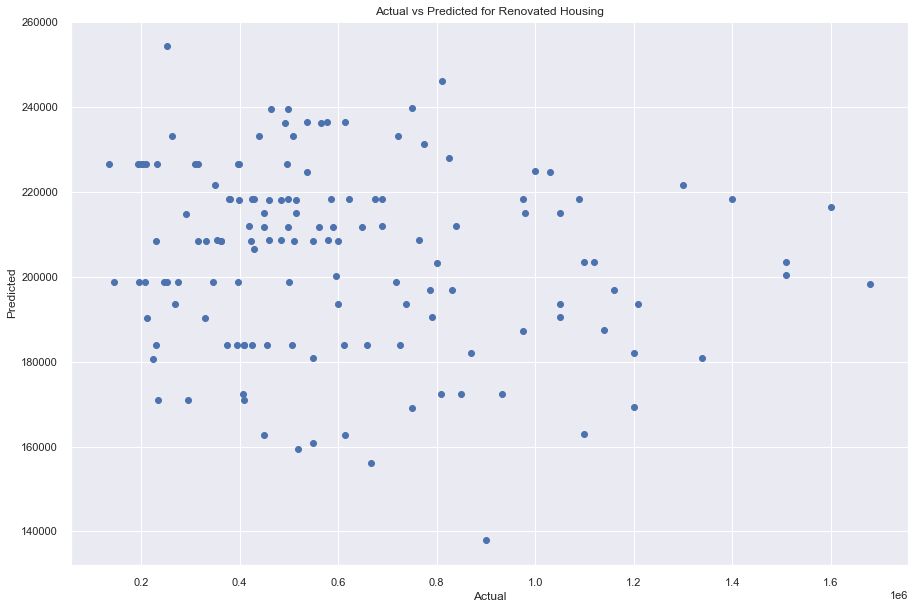

In [334]:
# using the Prediction data we use, we plot it against to see how accurate our model. 
# We see here in the renovated data set, there is alot of variability in the linear regression. 
# This will score very low, when we calulcate the model accuracy
plt.figure(figsize = (15,10))
plt.scatter(y1_test, prediction1)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted for Renovated Housing')

In [335]:
model01.score(x1_test, y1_test)

0.15639159136289682

In [336]:
model02.score(x2_test, y2_test)

0.3524174516574191

Text(0.5, 1.0, 'Actual vs Predicted for non renovated housing')

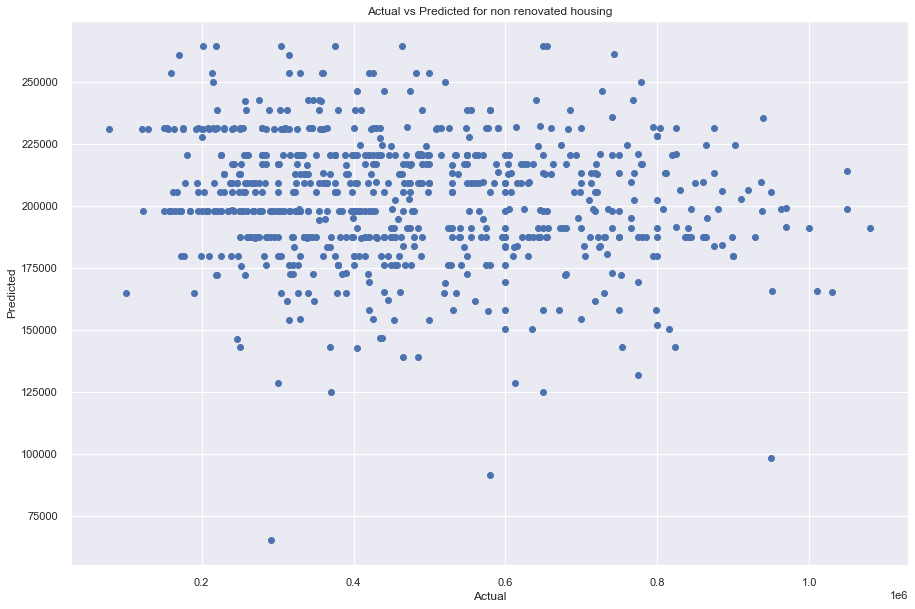

In [337]:
plt.figure(figsize = (15,10))
plt.scatter(y2_test, prediction2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted for non renovated housing')

### The model accuracy score for the renovated data set is 0.11.
### The model accuracy score for the non-renovated is 0.38.
### An Ideal model accuracy score is closer to 1.00, the more accurate the model is at calculating predicted vs actual values.
### Based on the two figures, of actual vs predictions for renovated and non-renovated, there is a lot of variability which makes it harder to accurately predict values.

## In Conclusion
First I evaluated how each coefficient (bedroom, bathroom, square foot living area, square foot above area) when renovated how they affect pricing of a home. While trimming the data did lower R squared, but it is known that the model accuracy score at the end would be significantly lower if not trimmed. The plot would now show a non linear trend at all if not trimmed. Trimming data to remove outliers increased model score accuracy at the end. Possibly more (or less) trimming could be done, to increase the model score accuracy seen at the the end.

## Next steps... 
#### 1) Evaluate methods to increase model accuracy
#### 2) evaluate trimming (decrease/increase trimming) see how this affects R squared and model accuracy score at the end.
#### 3) evluate what causes negative correlation in multiple linear regression